<a href="https://colab.research.google.com/github/rtajeong/M3/blob/main/lab15_GD_regression_classification_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (선형회귀)
### Ex1: Linear regression with two variables (y = wx + b)

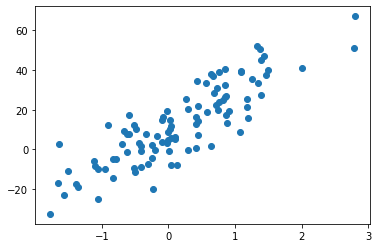

In [ ]:
# ex1: linear regression with two variables (y = wx + b)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
x = np.random.randn(n)                # batch size
y = x*20 + 10                         # w=20, b=10
y = y + np.random.randn(n) * 10       # add noise

plt.scatter(x,y)

In [ ]:
# --------
w=np.random.randn()   
b=np.random.randn()

lr = 0.2          # learning rate
n_epoch = 200
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w*x + b
    loss = ((y_pred - y)**2).mean()     # mean square error

    w = w - lr* ((y_pred - y)*x).mean()
    b = b - lr* (y_pred - y).mean()
    lossHistory.append(loss)
    if epoch %10 == 0:
        print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)
        
print('---------------------------')
print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)


epoch= 0 loss= 578.1458716383696 w= 2.412147037884191 b= 3.0173979570004423
epoch= 10 loss= 105.81682692498138 w= 16.12574170541002 b= 9.742807106864662
epoch= 20 loss= 100.16140775573426 w= 17.90625562343648 b= 9.811372877352346
epoch= 30 loss= 100.02918561013145 w= 18.1793440271969 b= 9.726605900697091
epoch= 40 loss= 100.02482074661636 w= 18.226192691867062 b= 9.702512495565902
epoch= 50 loss= 100.02466377888986 w= 18.234727189239237 b= 9.697267324563322
epoch= 60 loss= 100.02465804186349 w= 18.236326524344605 b= 9.69621214991877
epoch= 70 loss= 100.02465783157432 w= 18.236629997645824 b= 9.696006003309357
epoch= 80 loss= 100.02465782386228 w= 18.23668789037691 b= 9.695966197015514
epoch= 90 loss= 100.02465782357942 w= 18.236698959426302 b= 9.695958547370509
epoch= 100 loss= 100.02465782356907 w= 18.23670107783718 b= 9.695957080257484
epoch= 110 loss= 100.0246578235687 w= 18.236701483423897 b= 9.695956799116882
epoch= 120 loss= 100.0246578235687 w= 18.23670156108975 b= 9.69595674526

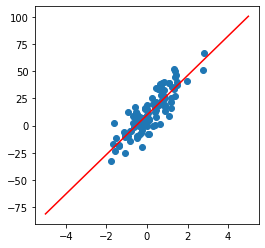

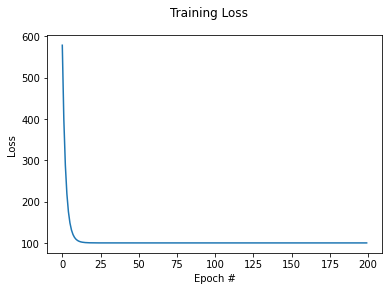

In [ ]:

# ------
plt.figure(figsize=(4,4))
plt.scatter(x,y)

xx = np.linspace(-5,5,100) 
yy = w * xx + b
plt.plot(xx,yy,c='r') 
plt.show()

fig = plt.figure()
plt.plot(np.arange(0, n_epoch), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

### Ex2: Training two features (x1, x2)  ( y = w1*x1 + w2*x2 + b)

In [ ]:
# ex 2 : training two parameters w1, w2 and b (y = w1*x1 + w2*x2 + b)

import numpy as np
import pandas as pd

n=100
x1 = np.random.randn(n)             # randn=normal distribution in (-1,1), rand=(0,1)
x2 = np.random.randn(n)

y = x1*30 + x2*40 + 50
y = y + np.random.randn(n)*20      # add noise

w1 = np.random.rand()               # initial guess
w2 = np.random.rand()
b = np.random.rand()

lr = 0.2                            # learning rate
n_epoch = 200                      # no of epoch
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = ((y_pred - y)**2).mean()

    w1 = w1 - lr* ((y_pred - y)*x1).mean()
    w2 = w2 - lr* ((y_pred - y)*x2).mean()
    b = b - lr* (y_pred - y).mean()
    lossHistory.append(error)
        
print('---------------------------')
print('epoch=', epoch, 'error=', error, 'w1=', w1.round(2), 'w2=', w2.round(2), 'b=', b.round(2))

---------------------------
epoch= 199 error= 355.7173785921428 w1= 29.02 w2= 43.46 b= 48.06


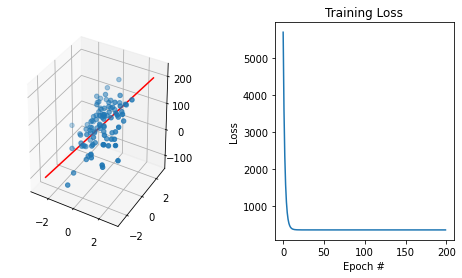

In [ ]:
# w1, w2, b = model.coef_[0], model.coef_[1], model.intercept_

plt.figure(figsize = (8,4))
ax1 = plt.subplot(121, projection='3d')
ax1.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100) 
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax1.plot(xx, yy, w1*xx + w2*yy + b, c='r') 

ax2 = plt.subplot(122)
ax2.plot(np.arange(0, n_epoch), lossHistory)
ax2.set_title("Training Loss")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Loss")

plt.subplots_adjust(wspace=0.5)
plt.show()

### Ex3: Using regression function (LinearRegression)

In [ ]:
# ex3: using regression function (LinearRegression)

from sklearn.linear_model import LinearRegression

# X = pd.DataFrame(x1)
# X[1] =x2

X = np.concatenate([x1.reshape(n,1), x2.reshape(n,1)], axis=1)

model = LinearRegression()        # create model
model.fit(X,y)                    # train model
print("score: ",model.score(X,y))
print('w1=', model.coef_[0], 'w2=', model.coef_[1], 'b=', model.intercept_)

# ------
# prediction
new_X=[1,3]
print(model.predict([new_X])) 

z=np.random.rand(10,2)
print(model.predict(z))

score:  0.8749253510901103
w1= 29.484773205271612 w2= 38.29879255785078 b= 51.09795511466808
[195.47910599]
[ 92.47502505  92.45004011  69.243384   106.9807229   87.88836978
  84.71097161 101.20028865  83.51668533  66.61139617  99.06667717]


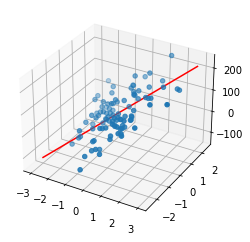

In [ ]:
# from mpl_toolkits import mplot3d

w1, w2, b = model.coef_[0], model.coef_[1], model.intercept_

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100) 
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax.plot(xx, yy, w1*xx + w2*yy + b, c='r') 

### Ex4: Use make_regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
X, y = make_regression(n_samples=2000, n_features=2, noise=1.5, random_state=1)
X = StandardScaler().fit_transform(X)
print(X[:5], y[:5])

[[ 0.33762316 -0.38981751]
 [-1.02672037  2.22938631]
 [ 0.09896413  0.63153974]
 [ 3.97755099 -1.64591196]
 [ 1.14153039 -0.70330793]] [-26.77111241 176.82634938  55.25266631 -79.36653137 -41.50945283]


In [ ]:
model = LinearRegression()        # create model
model.fit(X,y)                    # train model
model.score(X,y)

0.9996931455705321

# Classification (선형분류)
### Ex1: Linear classification with two variables


#### (1) data generation

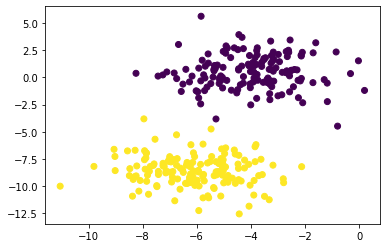

In [ ]:
from sklearn.datasets import make_blobs
N = 300
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, 
                    cluster_std=1.5, random_state=17)
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:

bias_factor = np.ones(X.shape[0]).reshape(-1,1)
X = np.concatenate((X, bias_factor), axis=1)
print(X.shape, y.reshape(-1,1).shape)

# just to see in dataframe form
arr = np.concatenate((X, y.reshape(-1,1)), axis=1)
df = pd.DataFrame(arr)
df.head()

#### (2) using MSE as loss function (error = (sigmoid(x) - y)**2)

0.4032632459402562 -1.0881605054720782 -1.7507705685136812
Accuracy:  0.9866666666666667


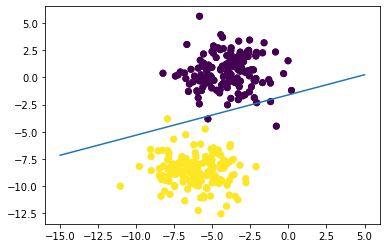

In [ ]:
# start gradient descent algorithm
W = np.random.randn(X.shape[1])   # initial W value

def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

lossHistory = []
epochs = 1000
alpha = 0.01
plt.scatter(X[:,0], X[:,1], c=y)

for epoch in np.arange(epochs):
    preds = sigmoid_activation(X.dot(W))
    error = preds - y
    loss = (error**2).sum()    # mean squares error
    
    lossHistory.append(loss)
   
    gradient = X.T.dot(error)/X.shape[0]
    W = W - alpha * gradient

w1, w2, b = W[0], W[1], W[2]
x1, x2 = X[:,0], X[:,1]
print(w1, w2, b)
accuracy = ((sigmoid_activation(w1*x1 + w2*x2 + b) > 0.5) == y).sum()/N
print("Accuracy: ", accuracy)

plt.scatter(X[:,0], X[:,1], c=y)
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy)

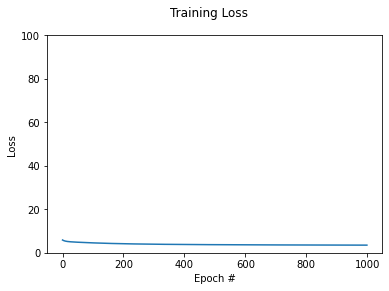

In [ ]:
# construct a figure that plots the loss over time
fig = plt.figure()
plt.ylim([0.,100])
plt.plot(np.arange(0, epochs), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

#### Ex3: use library function
- use SGDClassifier()

SGDClassifier:  0.9866666666666667
[[-23.93383345 -45.20550393]] [-267.68371478]
Logistic Regression:  0.99
[[-0.76590882 -1.6695544 ]] [-10.74752132]


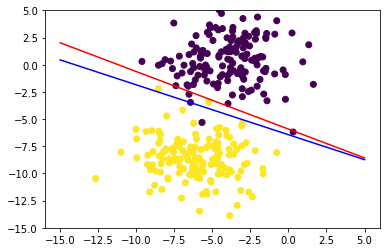

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.datasets import make_blobs

N = 300
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, 
                    cluster_std=2.0, random_state=17)

clf = SGDClassifier()      
clf.fit(X[:,:2], y)    
print("SGDClassifier: ", clf.score(X[:, :2],y))
print(clf.coef_, clf.intercept_)

log = LogisticRegression()      
log.fit(X[:,:2], y)    
print("Logistic Regression: ", log.score(X[:, :2],y))
print(log.coef_, log.intercept_)
plt.ylim([-15.,5.])
plt.scatter(X[:,0], X[:,1], c=y)

w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='r')

w1, w2, b = log.coef_[0,0], log.coef_[0,1], log.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='b')

# Ex4: Using Cross Entropy as loss function 
- Logistic Regression
- Classification by Calculating parameters one by one
- using CrossEntropy  as loss function
- number of features = 2

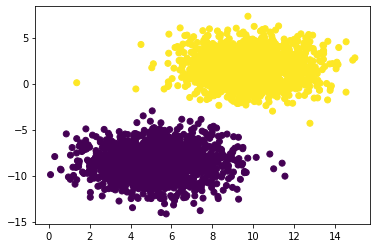

In [ ]:
from sklearn.datasets import make_blobs

N = 3000
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=1.7)
x1, x2 = X[:,0], X[:,1]
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:

w1 = np.random.randn()   # initial W value
w2 = np.random.randn()   # initial W value
b = np.random.randn()   # initial b value

def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

lossHistory = []
epochs = 700
alpha = 0.2

for epoch in np.arange(epochs):
    preds = sigmoid_activation(w1*x1 + w2*x2 + b)       # prediction
    # error = preds - y
    loss = -((y*np.log(preds) + (1-y)*np.log(1-preds))).mean()  # loss = cross entropy
    lossHistory.append(loss)
    
    dloss_dz = preds - y
    w1_deriv = dloss_dz * x1        # d(loss)/dw1 = d(loss)/dz * dz/dw1
    w2_deriv = dloss_dz * x2
    b_deriv = dloss_dz * 1
    
    w1 = w1 - (alpha * w1_deriv).mean()
    w2 = w2 - (alpha * w2_deriv).mean()
    b  = b  - (alpha * b_deriv).mean()

print(w1, w2, b)
accuracy = ((sigmoid_activation(w1*x1 + w2*x2 + b) > 0.5) == y).sum()/N
print(accuracy)


1.0504490652422247 1.7149136262103666 -2.5301485180060834
0.9996666666666667


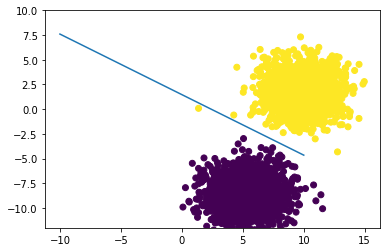

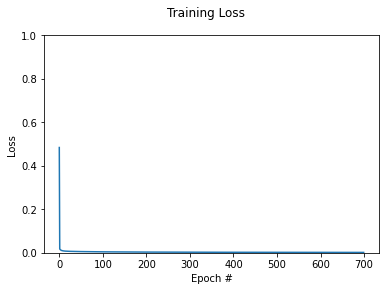

In [ ]:

plt.ylim([-12,10])
plt.scatter(X[:,0], X[:,1], c=y)
xx = np.linspace(-10,10,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy)
plt.show()

# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, epochs), lossHistory)
plt.ylim([0.,1.])
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

# 연습

### in machine learning training
- ![image.png](attachment:image.png)

- 이를 Log-loss 라고도 함. 확률 p를 계산하기 위해 시그모이드 함수를 사용할 수 있다. 여기서 z는 input feature 의 함수이다.
![image.png](attachment:image.png)

- ![image.png](attachment:image.png)

- ![image.png](attachment:image.png)

In [ ]:
import matplotlib
matplotlib.__version__

'3.3.2'

In [ ]:
# in case you have '3d' projection error
from mpl_toolkits.mplot3d import Axes3D
Axes3D = Axes3D